IMPORTAMOS LAS LIBRERÍAS

In [34]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración para visualización de imágenes
%matplotlib inline

CARGAMOS EL ARCHIVO

In [3]:
photos = pd.read_json("photos.json", lines = True)

In [4]:
photos.head()

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [5]:
photos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   photo_id     200100 non-null  object
 1   business_id  200100 non-null  object
 2   caption      200100 non-null  object
 3   label        200100 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


TRAS LAS PRIMERAS CONCLUSIONES, HORA DE PROCEDER CON LA LIMPIEZA DEL DF

In [6]:
photos1 = photos.drop(columns=['caption']) #eliminamos la columna caption

In [7]:
photos1.head() #chequeamos la eliminación

,photo_id,business_id,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,food


In [8]:
def df_1(photo_id): #aplicamos un filtro para las imágenes corruptas del df
    try:
        Image.open(f"photos1/{photo_id}.jpg")
        return True
    except:
        return False

lista_images = photos1["photo_id"].to_list()
corrupt_images = []
for imagen in lista_images:
     if not df_1(imagen):
         corrupt_images.append(imagen)    


In [9]:
photos2 = photos1.drop(columns=['business_id']) #photos2: sin la colunma de business id

In [10]:
photos2.head() #chequeamos 

,photo_id,label
0,zsvj7vloL4L5jhYyPIuVwg,inside
1,HCUdRJHHm_e0OCTlZetGLg,outside
2,vkr8T0scuJmGVvN2HJelEA,drink
3,pve7D6NUrafHW3EAORubyw,food
4,H52Er-uBg6rNrHcReWTD2w,food


In [11]:
photos2.info() #vemos cómo ha quedado todo tras la eliminación de las dos columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   photo_id  200100 non-null  object
 1   label     200100 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


Tenemos más de 200.000 datos. Es hora de ver la proporción en las labels y determinar si procede suprimir datos de alguna de alguna de ellas (de forma aleatoria porque el df ya está limpio gracias al filtro aplicado). El fin es que el df no esté desproporcionado en sus distintas categorías de imágenes 

In [12]:
conteo_categorias = photos2['label'].value_counts() #contamos

print(conteo_categorias)

label
food       108152
inside      56031
outside     18569
drink       15670
menu         1678
Name: count, dtype: int64


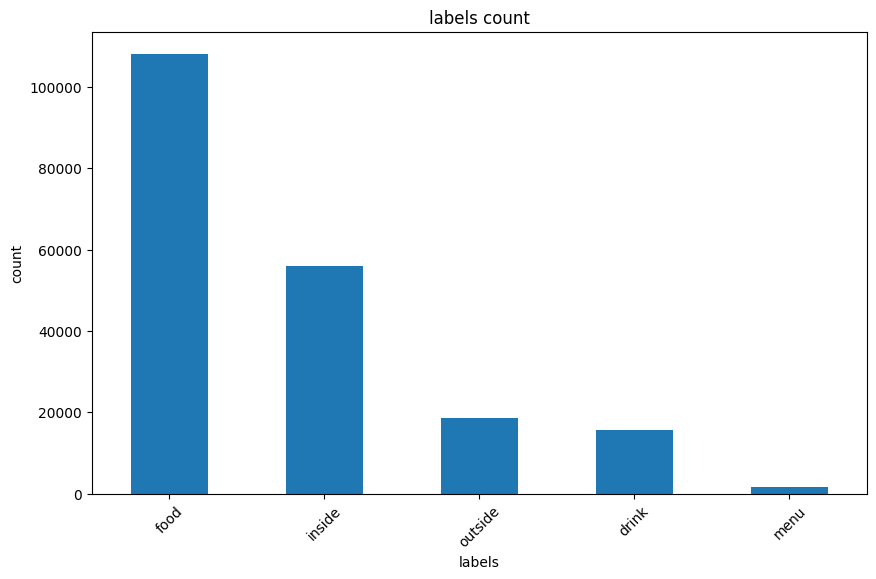

In [13]:
plt.figure(figsize=(10, 6))
conteo_categorias.plot(kind='bar')
plt.title('labels count')
plt.xlabel('labels')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

HAY MUCHA DESPROPORCIÓN EN LOS DATOS. TOCA AJUSTARLOS

In [14]:
print(conteo_categorias)

label
food       108152
inside      56031
outside     18569
drink       15670
menu         1678
Name: count, dtype: int64


In [15]:
def igualar1(photos2, etiqueta_columna, valor_columna, etiqueta_valor, num_filas):
    # Filtrar las filas que tienen la etiqueta específica
    filas_etiqueta = photos2[photos2[etiqueta_columna] == etiqueta_valor]
    
    # Verifica que num_filas no sea mayor que el total de filas con la etiqueta específica
    if num_filas > len(filas_etiqueta):
        raise ValueError("Error, coge un número más chico")
    
    # Seleccionar aleatoriamente los índices de las filas a eliminar
    indices_a_eliminar = np.random.choice(filas_etiqueta.index, num_filas, replace=False)
    
    # Eliminar las filas seleccionadas del dataset original
    photos3 = photos2.drop(indices_a_eliminar)
    
    return photos3 #photos3 se aplicará al df con la reducción de la etiqueta "food"

# Parámetros
etiqueta_columna = 'label'  # Nombre de la columna con la etiqueta
valor_columna = 'photo_id'       # Nombre de la columna con el valor asociado
etiqueta_valor = 'food'            # Valor específico de la etiqueta
num_filas = 106000                   # Número de filas a eliminar

# Eliminar filas con la etiqueta específica y su valor asociado
photos3 = igualar1(photos2, etiqueta_columna, valor_columna, etiqueta_valor, num_filas)





In [16]:
conteo_categorias2 = photos3['label'].value_counts() #una vez reducido food

print(conteo_categorias2)

label
inside     56031
outside    18569
drink      15670
food        2152
menu        1678
Name: count, dtype: int64


In [17]:
#A SEGUIR QUITANDO
def igualar2(photos3, etiqueta_columna, valor_columna, etiqueta_valor, num_filas):
    
    filas_etiqueta = photos3[photos3[etiqueta_columna] == etiqueta_valor]
    
    
    if num_filas > len(filas_etiqueta):
        raise ValueError("Error, coge un número más chico")
    
    
    indices_a_eliminar = np.random.choice(filas_etiqueta.index, num_filas, replace=False)
    
    
    photos4 = photos3.drop(indices_a_eliminar)
    
    return photos4 #photos4 se aplicará al df con la reducción de la etiqueta "inside"

# Parámetros
etiqueta_columna = 'label'  # Nombre de la columna con la etiqueta
valor_columna = 'photo_id'       # Nombre de la columna con el valor asociado
etiqueta_valor = 'inside'            # Valor específico de la etiqueta
num_filas = 53802                  # Número de filas a eliminar


photos4 = igualar2(photos3, etiqueta_columna, valor_columna, etiqueta_valor, num_filas)

In [18]:
conteo_categorias3 = photos4['label'].value_counts() #una vez reducido food

print(conteo_categorias3)

label
outside    18569
drink      15670
inside      2229
food        2152
menu        1678
Name: count, dtype: int64


In [19]:
#A SEGUIR QUITANDO, VAMOS CON OUTSIDE
def igualar3(photos4, etiqueta_columna, valor_columna, etiqueta_valor, num_filas):
    
    filas_etiqueta = photos4[photos4[etiqueta_columna] == etiqueta_valor]
    
    
    if num_filas > len(filas_etiqueta):
        raise ValueError("Error, coge un número más chico")
    
    
    indices_a_eliminar = np.random.choice(filas_etiqueta.index, num_filas, replace=False)
    
    
    photos5 = photos4.drop(indices_a_eliminar)
    
    return photos5 #photos5 se aplicará al df con la reducción de la etiqueta "outside"

# Parámetros
etiqueta_columna = 'label'  # Nombre de la columna con la etiqueta
valor_columna = 'photo_id'       # Nombre de la columna con el valor asociado
etiqueta_valor = 'outside'            # Valor específico de la etiqueta
num_filas = 16101                  # Número de filas a eliminar


photos5 = igualar3(photos4, etiqueta_columna, valor_columna, etiqueta_valor, num_filas)

In [20]:
conteo_categorias4 = photos5['label'].value_counts() #una vez reducido food

print(conteo_categorias4)

label
drink      15670
outside     2468
inside      2229
food        2152
menu        1678
Name: count, dtype: int64


In [21]:
#Ultimo DRINK
def igualar4(photos5, etiqueta_columna, valor_columna, etiqueta_valor, num_filas):
    
    filas_etiqueta = photos5[photos5[etiqueta_columna] == etiqueta_valor]
    
    
    if num_filas > len(filas_etiqueta):
        raise ValueError("Error, coge un número más chico")
    
    
    indices_a_eliminar = np.random.choice(filas_etiqueta.index, num_filas, replace=False)
    
    
    photos6 = photos5.drop(indices_a_eliminar)
    
    return photos6 #photos6 se aplicará al df con la reducción de la etiqueta "drink"

# Parámetros
etiqueta_columna = 'label'  # Nombre de la columna con la etiqueta
valor_columna = 'photo_id'       # Nombre de la columna con el valor asociado
etiqueta_valor = 'drink'            # Valor específico de la etiqueta
num_filas = 13020                 # Número de filas a eliminar


photos6 = igualar4(photos5, etiqueta_columna, valor_columna, etiqueta_valor, num_filas)

In [22]:
conteo_categorias5 = photos6['label'].value_counts() #una vez reducido food

print(conteo_categorias5)

label
drink      2650
outside    2468
inside     2229
food       2152
menu       1678
Name: count, dtype: int64


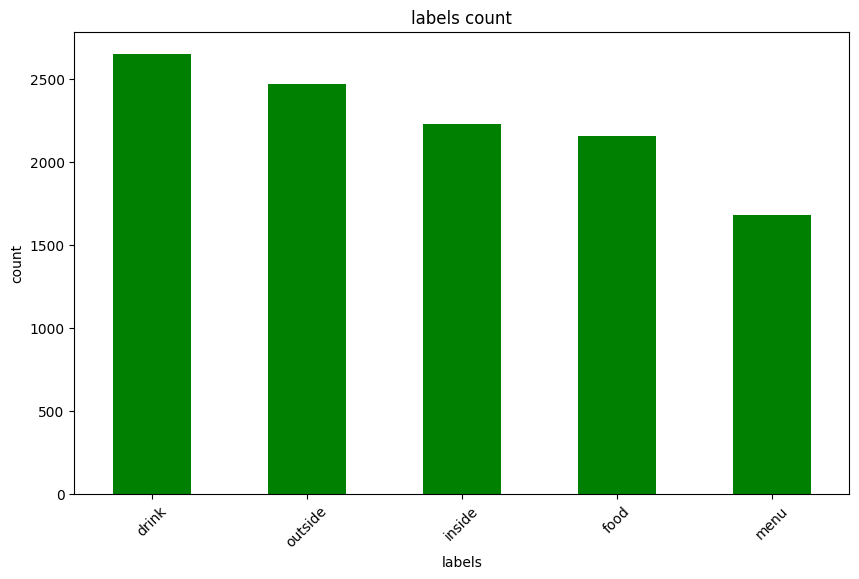

In [23]:
plt.figure(figsize=(10, 6))
conteo_categorias5.plot(kind='bar', color= 'green')
plt.title('labels count')
plt.xlabel('labels')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

AHORA LAS LABELS ESTÁN MÁS EQUILIBRADAS EN LA CANTIDAD DE DATOS QUE POSEEN

In [24]:
df_photos = photos6.copy() #hago una copia y lo renombro, por si las moscas

In [25]:
df_photos.tail()

,photo_id,label
200064,wq2E-d6NuiCP5_DCC_6e6g,menu
200073,ZtuEsa-qc7gfy7m5UnfaZw,menu
200075,BPup68ZGiSarP-XJ6Eu7QQ,drink
200091,_Rb8erugOe-11P843FBt-A,inside
200092,n8PcPp6Xyr26KwV06c3XNQ,food


In [26]:
def df_2(photo_id): #aplico el filtro otra vez porque quiero y puedo
    try:
        Image.open(f"df_photos/{photo_id}.jpg")
        return True
    except:
        return False

lista_images2 = df_photos["photo_id"].to_list()
corrupt_images2 = []
for imagen2 in lista_images2:
     if not df_2(imagen2):
         corrupt_images2.append(imagen)    

In [27]:
df_photos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11177 entries, 16 to 200092
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   photo_id  11177 non-null  object
 1   label     11177 non-null  object
dtypes: object(2)
memory usage: 262.0+ KB


In [28]:
df_photos.head(10) 

,photo_id,label
16,6LJa8QZOGBjt9maE5miLhw,menu
44,J0rm3mI98dISWsbmQaZWjw,food
45,-kDGc-WTDMjZp6AGgVErVg,outside
69,DtsfhqhqUB-tjs5XbwJfXw,menu
102,_0fOPZ2fUvQsva85t4aIMw,outside
141,WncqBTiN219jwiJX2ACbRw,food
199,TzxhwK7YuVMVyu-p3QKPKA,food
231,vCGCrBw0J-JLjbmHAabF7w,drink
236,VB75GlozO9ZzkhQC8mY6Ag,menu
250,uEz2Ix2q_NZIIpNho31sjA,inside


In [29]:
# Resetear el índice para que sea consecutivo porque vemos que las numeraciones de las filas están salteadas
df_photos.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame con el índice reseteado
print("\nDataFrame con índice reseteado:")
print(df_photos.head(10))


DataFrame con índice reseteado:
                 photo_id    label
0  6LJa8QZOGBjt9maE5miLhw     menu
1  J0rm3mI98dISWsbmQaZWjw     food
2  -kDGc-WTDMjZp6AGgVErVg  outside
3  DtsfhqhqUB-tjs5XbwJfXw     menu
4  _0fOPZ2fUvQsva85t4aIMw  outside
5  WncqBTiN219jwiJX2ACbRw     food
6  TzxhwK7YuVMVyu-p3QKPKA     food
7  vCGCrBw0J-JLjbmHAabF7w    drink
8  VB75GlozO9ZzkhQC8mY6Ag     menu
9  uEz2Ix2q_NZIIpNho31sjA   inside


In [30]:
df_photos.tail(10) 

,photo_id,label
11167,9gZBMB8B2S9YjKpdbql3tg,inside
11168,muy6Y4zERBISabnbNGefQw,food
11169,8ZldnphijLWEvWWX6Y57Lg,menu
11170,vYTLPbEzFgeD4SuxpN0OHw,drink
11171,IAS8JJCU6As27BoHpVSvEA,outside
11172,wq2E-d6NuiCP5_DCC_6e6g,menu
11173,ZtuEsa-qc7gfy7m5UnfaZw,menu
11174,BPup68ZGiSarP-XJ6Eu7QQ,drink
11175,_Rb8erugOe-11P843FBt-A,inside
11176,n8PcPp6Xyr26KwV06c3XNQ,food


TRAS VER QUE TODO ESTÁ CORRECTO, HORA DE ABRIR LAS FOTOS Y VER QUE TODO ESTÁ OK EN LA APERTURA :) 

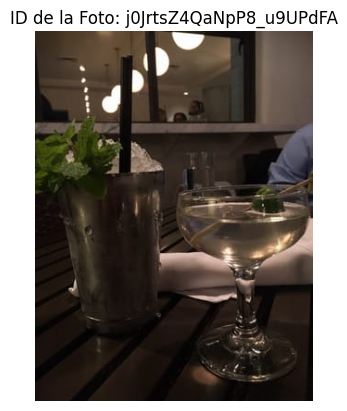

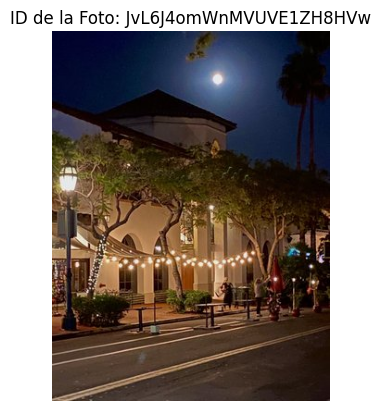

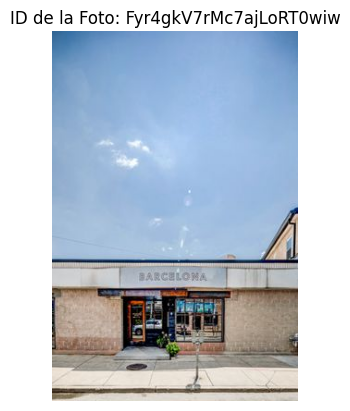

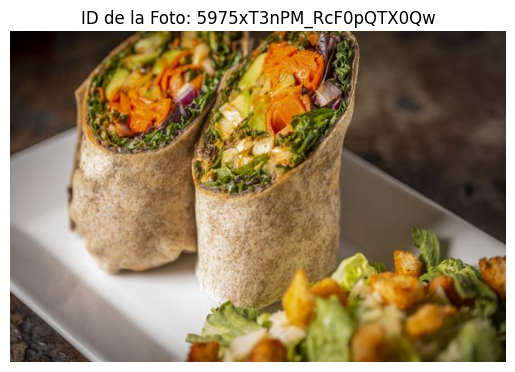

In [37]:
# Carpeta donde se encuentran las imágenes (pon la ubicación de tu carpeta)
image_folder = '/Users/florentinoromerourquiza/Documents/yelp_photos-002/photos'

photo_ids = df_photos['photo_id']

# el número de fotos que quieres que aparezcan al ejecutar esta celda (apareceran de forma aleatoria)
num_photos = 4

# Variable para seleccionar aleatoriamente las IDs de las fotos
random_photo_ids = random.sample(list(photo_ids), num_photos)

for photo_id in random_photo_ids:
    
    image_path = os.path.join(image_folder, f'{photo_id}.jpg')
    
    img = Image.open(image_path)
    
    plt.imshow(img)
    plt.title(f'ID de la Foto: {photo_id}')
    plt.axis('off')
    plt.show()